# Weather Forecasting

#Sample Model - Version 1

Model Accuracy: 51.00%
Day 1: Probability of rain = 0.53
Day 2: Probability of rain = 0.47
Day 3: Probability of rain = 0.54
Day 4: Probability of rain = 0.54
Day 5: Probability of rain = 0.52
Day 6: Probability of rain = 0.49
Day 7: Probability of rain = 0.52
Day 8: Probability of rain = 0.53
Day 9: Probability of rain = 0.53
Day 10: Probability of rain = 0.53


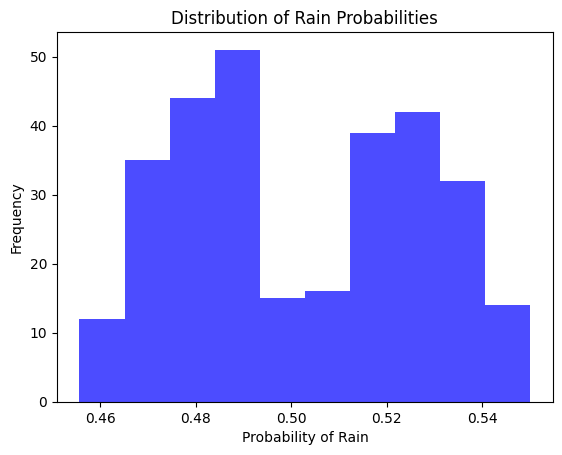

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your historical weather data
# Example: The data should have columns like 'Temperature', 'Humidity', 'WindSpeed', 'RainToday', 'RainTomorrow'
# df = pd.read_csv('weather_data.csv')
# For illustration, let's assume the data looks something like this:
data = {
    'Temperature': np.random.uniform(15, 35, 1000),
    'Humidity': np.random.uniform(30, 90, 1000),
    'WindSpeed': np.random.uniform(0, 20, 1000),
    'RainToday': np.random.choice([0, 1], 1000), # 0: No rain, 1: Rain
    'RainTomorrow': np.random.choice([0, 1], 1000)
}
df = pd.DataFrame(data)

# Split data into features and target
X = df[['Temperature', 'Humidity', 'WindSpeed', 'RainToday']]
y = df['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of rain

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display probability predictions
for i in range(10):  # Show a sample of 10 predictions
    print(f"Day {i+1}: Probability of rain = {y_pred_prob[i]:.2f}")

# Optional: plot the probabilities
plt.hist(y_pred_prob, bins=10, color='blue', alpha=0.7)
plt.xlabel('Probability of Rain')
plt.ylabel('Frequency')
plt.title('Distribution of Rain Probabilities')
plt.show()


In [11]:
import requests
from datetime import datetime
current_date = datetime.now().date()

print("Current Date:", current_date)


def get_weather_open_meteo(lat, lon, city_name):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature")
        windspeed = current_weather.get("windspeed")
        print(f"{city_name} - Temperature: {temperature}°C, Wind Speed: {windspeed} km/h")
    else:
        print(f"Failed to retrieve data for {city_name}")

# List of 25 major cities with their coordinates
cities = [
    ("New York", 40.7128, -74.0060),
    ("Los Angeles", 34.0522, -118.2437),
    ("Chicago", 41.8781, -87.6298),
    ("Houston", 29.7604, -95.3698),
    ("Phoenix", 33.4484, -112.0740),
    ("London", 51.5074, -0.1278),
    ("Paris", 48.8566, 2.3522),
    ("Tokyo", 35.6895, 139.6917),
    ("Mumbai", 19.0760, 72.8777),
    ("Sydney", -33.8688, 151.2093),
    ("Cape Town", -33.9249, 18.4241),
    ("Moscow", 55.7558, 37.6173),
    ("Dubai", 25.2048, 55.2708),
    ("Singapore", 1.3521, 103.8198),
    ("São Paulo", -23.5505, -46.6333),
    ("Mexico City", 19.4326, -99.1332),
    ("Bangkok", 13.7563, 100.5018),
    ("Jakarta", -6.2088, 106.8456),
    ("Zurich", 47.3769, 8.5417),
    ("Dublin", 53.3498, -6.2603),
    ("Chennai", 13.0827, 80.2707),
    ("Bangalore", 12.9716, 77.5946),
    ("Vienna", 48.2082, 16.3738)
]

# Retrieve weather for each city
for city_name, lat, lon in cities:
    get_weather_open_meteo(lat, lon, city_name)


Current Date: 2024-10-29
New York - Temperature: 16.5°C, Wind Speed: 15.3 km/h
Los Angeles - Temperature: 12.2°C, Wind Speed: 6.4 km/h
Chicago - Temperature: 18.9°C, Wind Speed: 23.0 km/h
Houston - Temperature: 24.4°C, Wind Speed: 16.4 km/h
Phoenix - Temperature: 17.1°C, Wind Speed: 16.6 km/h
London - Temperature: 15.3°C, Wind Speed: 5.8 km/h
Paris - Temperature: 13.9°C, Wind Speed: 5.0 km/h
Tokyo - Temperature: 11.8°C, Wind Speed: 7.1 km/h
Mumbai - Temperature: 29.2°C, Wind Speed: 0.5 km/h
Sydney - Temperature: 16.2°C, Wind Speed: 0.5 km/h
Cape Town - Temperature: 19.8°C, Wind Speed: 21.3 km/h
Moscow - Temperature: 6.2°C, Wind Speed: 11.5 km/h
Dubai - Temperature: 29.9°C, Wind Speed: 19.7 km/h
Singapore - Temperature: 28.1°C, Wind Speed: 2.2 km/h
São Paulo - Temperature: 25.0°C, Wind Speed: 9.8 km/h
Mexico City - Temperature: 13.8°C, Wind Speed: 1.1 km/h
Bangkok - Temperature: 28.7°C, Wind Speed: 2.5 km/h
Jakarta - Temperature: 28.5°C, Wind Speed: 2.4 km/h
Zurich - Temperature: 14.3°C

In [12]:
import requests

def get_weather_weatherapi(city):
    api_key = "API_KEY"
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        temperature = data['current']['temp_c']
        condition = data['current']['condition']['text']
        print(f"Temperature: {temperature}°C")
        print(f"Condition: {condition}")
    else:
        print()
        #print("Failed to retrieve data")

# Example usage
get_weather_weatherapi("San Francisco")
